In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [57]:
data = pd.read_csv('../dataset/mammographic_masses.data', header=None, na_values='?')
data.columns = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']

print(data.shape)

(961, 6)


In [58]:
data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [59]:
data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Fix outliers and missing values

In [60]:
# Check for missing values
for i in data.columns[data.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    data[i].fillna(round(data[i].mean()),inplace=True)
data

#---Checking for Outliers
data.drop(data[data['BI-RADS'] >= 6 ].index, inplace=True)
data.drop(data[data['BI-RADS'] <= 0 ].index, inplace=True)

data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,4.297669,55.399364,2.719280,2.795551,2.916314,0.458686
std,0.612139,14.449328,1.225658,1.531411,0.366099,0.498554
min,2.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,56.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


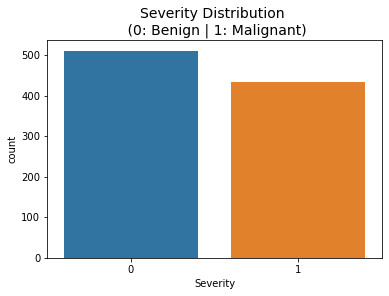

Benign:  54.13 % of the dataset
Malignant:  45.87 % of the dataset


In [61]:
sns.countplot(x='Severity', data=data)
plt.title('Severity Distribution \n (0: Benign | 1: Malignant)', fontsize=14)
plt.show()

print('Benign: ', round(data['Severity'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Malignant: ', round(data['Severity'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


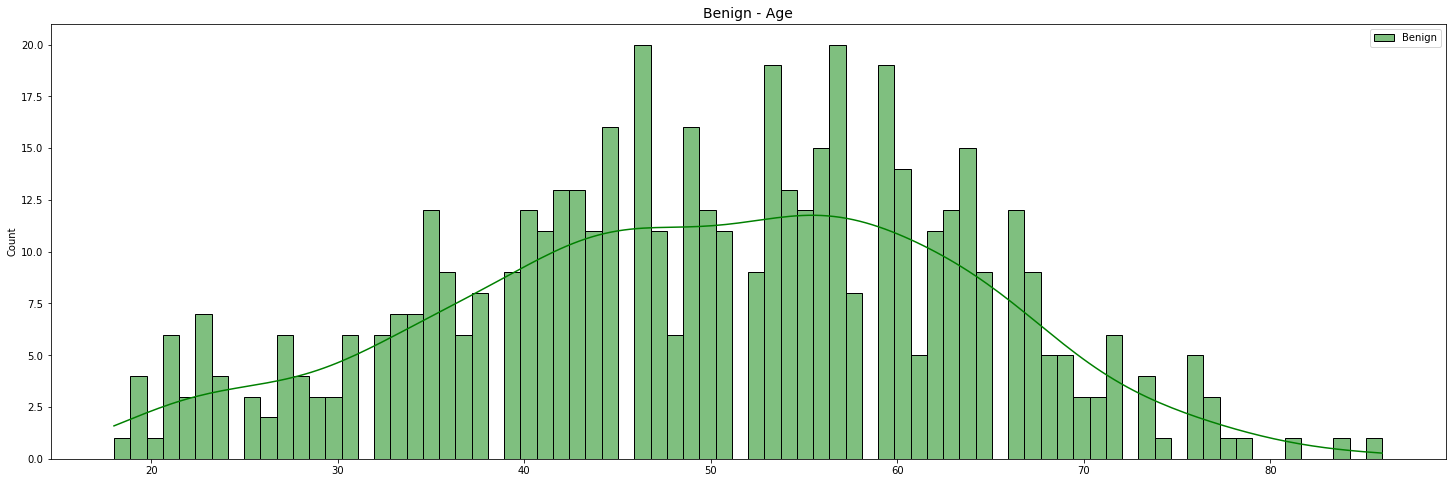

In [62]:
age_benign = data.Age[data.Severity == 0].values

bins = int(data['Age'].max()) - int(data['Age'].min())

plt.figure(figsize=(25,8))

sns.histplot(age_benign, bins=bins, kde=True, color='green', label='Benign')
plt.title('Benign - Age', fontsize=14)
plt.legend()
plt.show()

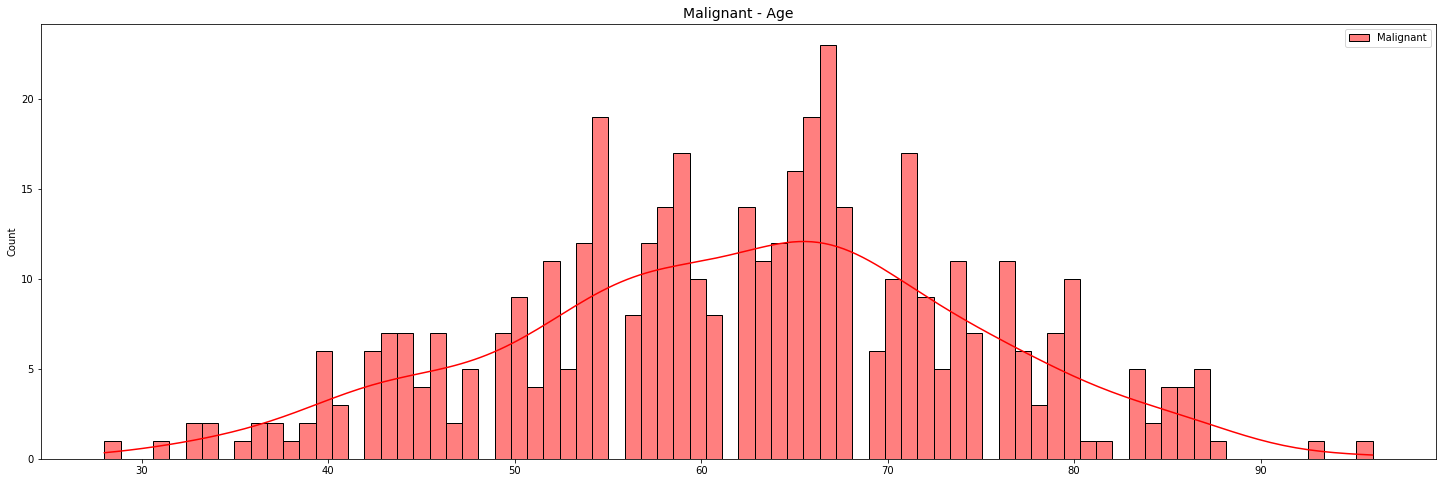

In [63]:
age_malign = data.Age[data.Severity == 1].values

bins = int(data['Age'].max()) - int(data['Age'].min())

plt.figure(figsize=(25,8))

sns.histplot(age_malign, bins=bins, kde=True, color='red', label='Malignant')
plt.title('Malignant - Age', fontsize=14)
plt.legend()
plt.show()

Correlation Matrices

Text(0.5, 1.0, 'Correlation Matrix')

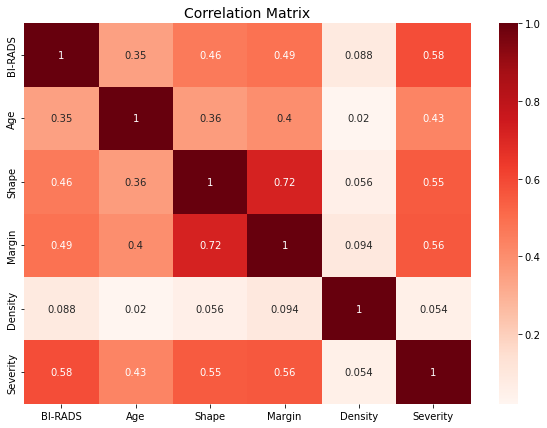

In [64]:
corr = data.corr()

plt.figure(figsize=(10, 7))

sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Matrix', fontsize=14)

Text(0.5, 1.0, 'Severity - Margin')

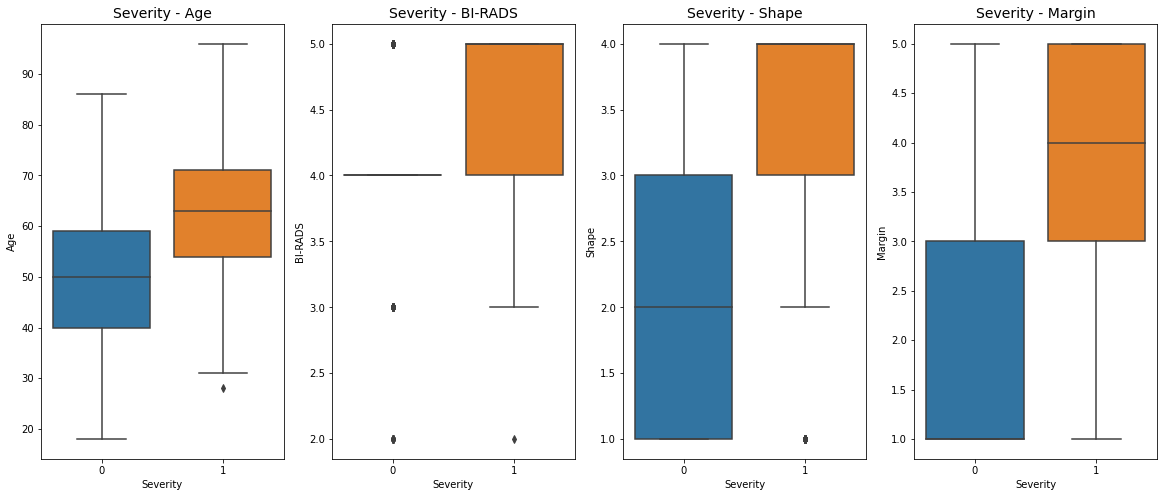

In [65]:
f, axes = plt.subplots(ncols=4, figsize=(20, 8))

sns.boxplot(x='Severity', y='Age', data=data, ax=axes[0])
axes[0].set_title('Severity - Age', fontsize=14) 

sns.boxplot(x='Severity', y='BI-RADS', data=data, ax=axes[1])
axes[1].set_title('Severity - BI-RADS', fontsize=14) 

sns.boxplot(x='Severity', y='Shape', data=data, ax=axes[2])
axes[2].set_title('Severity - Shape', fontsize=14)

sns.boxplot(x='Severity', y='Margin', data=data, ax=axes[3])
axes[3].set_title('Severity - Margin', fontsize=14) 


Standardization, Normalization

In [66]:
features_values = data.values[:, 0:5]
severity_values = data['Severity']

print(severity_values.shape)
print(features_values.shape)

severity_values = severity_values.values.reshape(-1, 1)
print(severity_values.shape)

(944,)
(944, 5)
(944, 1)


In [67]:
scaler  = StandardScaler()
features_values = scaler.fit_transform(features_values)
features_values

array([[ 1.1479474 ,  0.80327507,  0.22915791,  1.44025222,  0.22871089],
       [-0.48653578, -0.8585823 , -1.40348413, -1.17310309,  0.22871089],
       [ 1.1479474 ,  0.18007856,  1.04547894,  1.44025222,  0.22871089],
       ...,
       [-0.48653578,  0.5955429 ,  1.04547894,  1.44025222,  0.22871089],
       [ 1.1479474 ,  0.73403102,  1.04547894,  1.44025222,  0.22871089],
       [-0.48653578,  0.45705479,  0.22915791,  0.13357457,  0.22871089]])

Training and testing

In [79]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features_values, severity_values, test_size=0.2, random_state=0)

Logistic Regression

In [69]:
logitN = LogisticRegression()
logitN.fit(X_train,y_train)
print('Accuracy of log reg classifier')
print(logitN.score(X_train, y_train))

y_pred = logitN.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy of log reg classifier
0.836864406779661


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


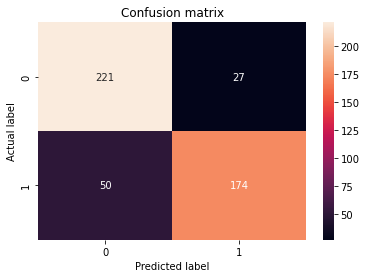

In [70]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

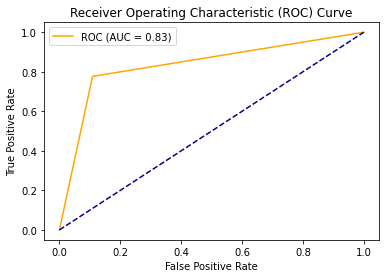

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       248
           1       0.87      0.78      0.82       224

    accuracy                           0.84       472
   macro avg       0.84      0.83      0.84       472
weighted avg       0.84      0.84      0.84       472



(944, 5)
(944, 3)


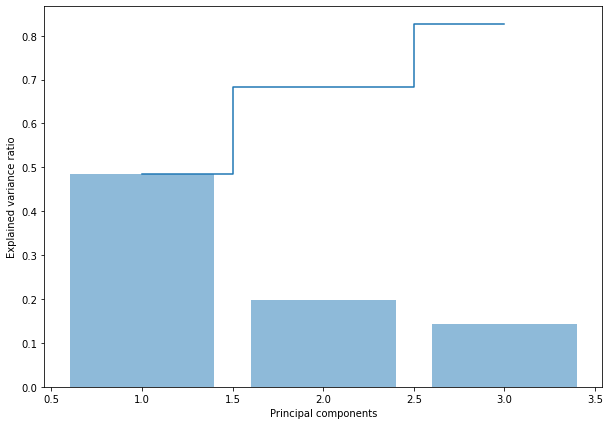

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features_values)
print(features_values.shape)
print(pca_features.shape)

plt.figure(figsize=(10, 7))
plt.bar([1,2,3], pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step([1,2,3], np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


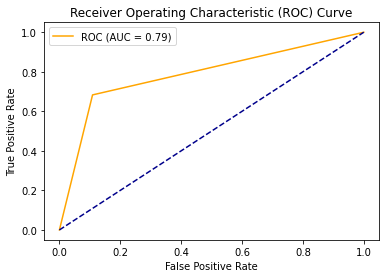

In [74]:
from sklearn import svm, model_selection

svc = svm.SVC(kernel='linear', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

frp, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [75]:
svc = svm.SVC(kernel='nonlinear', C=1, gamma='auto')
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

frp, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: 'nonlinear' is not in list

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[95 11]
 [15 68]]


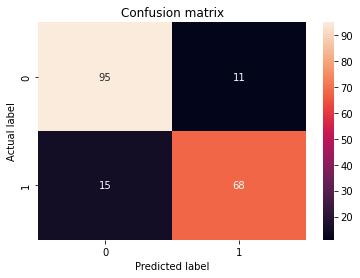

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       106
           1       0.86      0.82      0.84        83

    accuracy                           0.86       189
   macro avg       0.86      0.86      0.86       189
weighted avg       0.86      0.86      0.86       189



In [84]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(max_iter=5000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(y_test, y_pred))